In this demo, we will try to model time series using LSTMs. We will try two kind of time series, a periodic time series (generated using sine function) and a transcendental time series (generated using exponential function)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import math
# from sklearn.metrics import mean_squared_error

In [2]:
# function to be modelled
f = np.sin

In [3]:
number_of_period = 10
number_of_points_per_period = 20

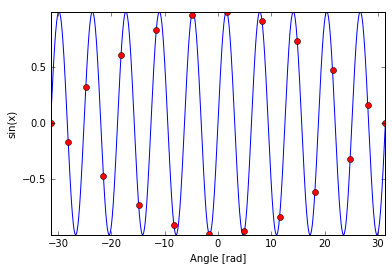

In [4]:
x = np.linspace(-number_of_period*np.pi, number_of_period*np.pi, number_of_points_per_period)
X = np.linspace(-number_of_period*np.pi, number_of_period*np.pi, 1000)
plt.plot(X, np.sin(X), 'b')
plt.plot(x, np.sin(x), 'ro')
plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

We will try to predict the series corresponding to sine values of X, given the previous sine values.

In [5]:
np.random.seed(42)
dataset = np.sin(X)

In [6]:
# train-test split
train_size = int(0.8*len(dataset))
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]

In [7]:
len(train)

800

In [8]:
# convert a time series array into matrix of previous values
def create_dataset(dataset, look_back=1):
    data_x, data_y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        data_x.append(a)
        data_y.append(dataset[i + look_back])
    return np.array(data_x), np.array(data_y)

In [9]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [10]:
train[0], train[1], train[2]

(1.2246467991473533e-15, 0.062853290044483701, 0.12545803018029833)

In [11]:
trainX[0], trainX[1], trainX[2]

(array([  1.22464680e-15]), array([ 0.06285329]), array([ 0.12545803]))

In [12]:
trainY[0], trainY[1], trainY[2]

(0.062853290044483701, 0.12545803018029833, 0.18756665337583991)

In [13]:
trainX.shape

(798, 1)

In [14]:
# reshape input
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [15]:
from keras.layers import Dense, LSTM
from keras.models import Sequential

Using TensorFlow backend.


In [16]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_dim=look_back))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [17]:
model.fit(trainX, trainY, nb_epoch=5, batch_size=1, validation_data=(testX, testY))

Train on 798 samples, validate on 198 samples
Epoch 1/5
798/798 [==============================] - 3s - loss: 0.0668 - val_loss: 0.0037
Epoch 2/5
798/798 [==============================] - 3s - loss: 0.0036 - val_loss: 0.0034
Epoch 3/5
798/798 [==============================] - 3s - loss: 0.0034 - val_loss: 0.0032
Epoch 4/5
798/798 [==============================] - 3s - loss: 0.0031 - val_loss: 0.0030
Epoch 5/5
798/798 [==============================] - 3s - loss: 0.0030 - val_loss: 0.0028


In [18]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [19]:
len(trainPredict)

798

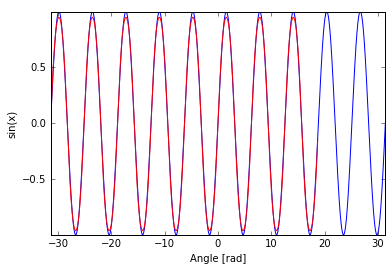

In [20]:
x = np.linspace(-number_of_period*np.pi, number_of_period*np.pi, 1000)[:len(trainPredict)]
X = np.linspace(-number_of_period*np.pi, number_of_period*np.pi, 1000)
plt.plot(X, np.sin(X), 'b')
plt.plot(x, trainPredict, 'r')
plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

Let us increase the lookback size

In [21]:
look_back = 5
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print(trainX.shape)

(794, 1, 5)


In [22]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_dim=look_back))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=5, batch_size=1, validation_data=(testX, testY))

Train on 794 samples, validate on 194 samples
Epoch 1/5
794/794 [==============================] - 4s - loss: 0.1264 - val_loss: 0.0141
Epoch 2/5
794/794 [==============================] - 4s - loss: 0.0109 - val_loss: 0.0076
Epoch 3/5
794/794 [==============================] - 4s - loss: 0.0051 - val_loss: 0.0028
Epoch 4/5
794/794 [==============================] - 4s - loss: 0.0016 - val_loss: 7.1983e-04
Epoch 5/5
794/794 [==============================] - 3s - loss: 4.7645e-04 - val_loss: 3.0674e-04


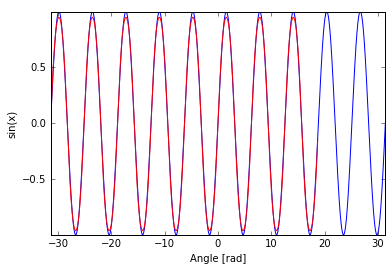

In [23]:
x = np.linspace(-number_of_period*np.pi, number_of_period*np.pi, 1000)[:len(trainPredict)]
X = np.linspace(-number_of_period*np.pi, number_of_period*np.pi, 1000)
plt.plot(X, np.sin(X), 'b')
plt.plot(x, trainPredict, 'r')
plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

In [24]:
f = np.exp

In [25]:
f(100)

2.6881171418161356e+43

In [26]:
number_of_points = 20

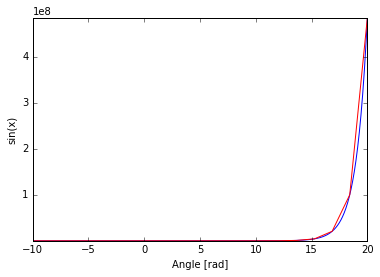

In [27]:
plt.close()
x = np.linspace(-10, 20, number_of_points_per_period)
X = np.linspace(-10, 20, 1000)
plt.plot(X, f(X), 'b')
plt.plot(x, f(x), 'r')
plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

In [28]:
dataset = f(X)
# train-test split
train_size = int(0.8*len(dataset))
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]

In [29]:
len(dataset)

1000

In [30]:
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print(trainX.shape)

(789, 1, 10)


In [31]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_dim=look_back))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=5, batch_size=1, validation_data=(testX, testY))

Train on 789 samples, validate on 189 samples
Epoch 1/5
789/789 [==============================] - 5s - loss: 29258843299.1298 - val_loss: 20119605448825884.0000
Epoch 2/5
789/789 [==============================] - 4s - loss: 29258720411.7025 - val_loss: 20119605402624736.0000
Epoch 3/5
789/789 [==============================] - 6s - loss: 29258643702.8705 - val_loss: 20119605384907132.0000
Epoch 4/5
789/789 [==============================] - 5s - loss: 29258566938.4160 - val_loss: 20119605181058964.0000
Epoch 5/5
789/789 [==============================] - 3s - loss: 29258490905.1003 - val_loss: 20119605165552244.0000


In [32]:
from keras.optimizers import Adam
model = Sequential()
model.add(LSTM(128, input_dim=look_back))
model.add(Dense(1))
adam = Adam(lr=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.01)
model.compile(loss='mean_squared_error', optimizer=adam)
model.fit(trainX, trainY, nb_epoch=5, batch_size=1, validation_data=(testX, testY))

Train on 789 samples, validate on 189 samples
Epoch 1/5
789/789 [==============================] - 6s - loss: 29258459789.5703 - val_loss: 20119604310432968.0000
Epoch 2/5
789/789 [==============================] - 5s - loss: 29258097475.6435 - val_loss: 20119605164664560.0000
Epoch 3/5
789/789 [==============================] - 7s - loss: 29257943154.4086 - val_loss: 20119604227255648.0000
Epoch 4/5
789/789 [==============================] - 5s - loss: 29257588246.8634 - val_loss: 20119601859892824.0000
Epoch 5/5
789/789 [==============================] - 4s - loss: 29257141981.3606 - val_loss: 20119601542472504.0000


In [33]:
from keras.optimizers import Adam
model = Sequential()
model.add(LSTM(128, input_dim=look_back))
model.add(Dense(1))
adam = Adam(lr=100, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.01)
model.compile(loss='mean_squared_error', optimizer=adam)
model.fit(trainX, trainY, nb_epoch=5, batch_size=1, validation_data=(testX, testY))

Train on 789 samples, validate on 189 samples
Epoch 1/5
789/789 [==============================] - 5s - loss: 27072245573.6704 - val_loss: 20111749399635524.0000
Epoch 2/5
789/789 [==============================] - 4s - loss: 26856179982.4856 - val_loss: 20111993436103912.0000
Epoch 3/5
789/789 [==============================] - 7s - loss: 26831243375.3546 - val_loss: 20111553216540432.0000
Epoch 4/5
789/789 [==============================] - 6s - loss: 26823764139.0539 - val_loss: 20111385084646740.0000
Epoch 5/5
789/789 [==============================] - 6s - loss: 26810477668.8825 - val_loss: 20111327650388760.0000


In [34]:
from keras.optimizers import Adam
model = Sequential()
model.add(LSTM(128, input_dim=look_back))
model.add(Dense(1))
adam = Adam(lr=10000, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.01)
model.compile(loss='mean_squared_error', optimizer=adam)
model.fit(trainX, trainY, nb_epoch=5, batch_size=1, validation_data=(testX, testY))

Train on 789 samples, validate on 189 samples
Epoch 1/5
789/789 [==============================] - 4s - loss: 32539645158.3865 - val_loss: 20114187921012964.0000
Epoch 2/5
789/789 [==============================] - 4s - loss: 28745506793.4496 - val_loss: 20106352876257628.0000
Epoch 3/5
789/789 [==============================] - 5s - loss: 28699035375.9490 - val_loss: 20120055450224760.0000
Epoch 4/5
789/789 [==============================] - 6s - loss: 27882852734.9969 - val_loss: 20110732077354468.0000
Epoch 5/5
789/789 [==============================] - 5s - loss: 27556250001.6570 - val_loss: 20105960024518504.0000


In [ ]:
from keras.optimizers import Adam
model = Sequential()
model.add(LSTM(128, input_dim=look_back))
model.add(Dense(1))
adam = Adam(lr=1000000, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.01)
model.compile(loss='mean_squared_error', optimizer=adam)
model.fit(trainX, trainY, nb_epoch=5, batch_size=1, validation_data=(testX, testY))

Train on 789 samples, validate on 189 samples
Epoch 1/5
789/789 [==============================] - 6s - loss: 5557768495483.7451 - val_loss: 20097285755936724.0000
Epoch 2/5
789/789 [==============================] - 6s - loss: 47645419435.4168 - val_loss: 20109587756963156.0000
Epoch 3/5
379/789 [=============>................] - ETA: 3s - loss: 63554886597.6832